<a href="https://colab.research.google.com/github/angelicayang/DataBootcamp/blob/main/FinalProjectSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Music Trends; 1950 to 2015

## Introduction to Problem & Data

#### Problem Statement:
The cyclical nature of trends can be found in all aspects of popular culture. It can be seen in fashion (the Y2K look and its current grip on younger generations); in film and television, from revivals of genres and reboots of classics (*Fuller House* (2016)) to decades-based storytelling (*Stranger Things*, set in the 1980s); retro technology (Polaroid film cameras, record players); revived art movements, beauty standards, culinary trends, and more.

For my project, I aim to find characteristics of popular music that may demonstrate a cyclical nature. In doing so, I will attempt to predict traits of popular music that will replicate itself as familiar tastes resurface amongst the public.

The music industry permeates people's lives in innumerable ways. Streaming platforms, like Spotify and Apple Music, create curated playlists and algorithms to predict trending genres and artists, ensuring they capture user's interests before other competitors. The accuracy and speed of a streaming platform's ability to predict trending genres and music types is essential to maintaining their competitive edge. I aim to predict upcoming trends in music based on sound qualities and some lyric analysis. Using historical data, I have sourced almost 60 years' worth of Top 100 Tracks on Spotify from Kaggle to do so.

#### Dataset Description:

Data for this project is sourced from Kaggle in csv format, providing comprehensive information on the Top 100 Tracks on Spotify, ranging from 1950 to 2015. It will require cleaning. I am not looking to analyze all of the data on the lyrical/syntactic compositions of songs, but rather place a stronger focus on sound characteristics of tracks: i.e., how songs are percieved. There are a good number of features measuring syntactic qualities of lyrics that I will not inquire into as much as other characteristics. There are also a high number of null values within the dataset.  

This dataset contains the following information:

**artist name**;

**artists** (if there were multiple on a track);

**song title**;

**year** (that it was ranked in the top 100);

**position** (the track held in the top 100);

**popularity** (same as above);

**positive/negative/neutral sentiment of lyrics;**

**the Flesch-Kincaid Grade level** of sophistication/comprehensibility of lyrics;

**the Gunning Fog index** of lyric readability/complexity;

**other lyric factors** (average syllables per word, difficult words, number of words);

**genre tags;**

**ranking of popularity** (1-100);

**explicitness** (content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children);

**danceability** (how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity– value of 0.0 is least danceable);

**energy** (measure from 0.0 to 1.0, represents a perceptual measure of intensity and activity);

**duration** (in milliseconds);

**key** (integers map to pitches using standard Pitch Class notation, e.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on; if no key was detected, the value is -1);

**loudness** (overall loudness of a track in decibels (dB) averaged across the entire track, typically range between -60 and 0 db);

**speechiness** (presence of spoken words in a track, the more exclusively speech-like the recording (talk show, audio book, poetry), the closer to 1.0; values above 0.66 indicate track is probably made entirely of spoken words, between 0.33 and 0.66 describe tracks that may contain both music and speech such as rap, below 0.33 most likely represent music and other non-speech-like tracks);

**acousticness** (confidence measure from 0.0 to 1.0 of whether the track is acoustic; 1.0 represents high confidence the track is acoustic);

**instrumentalness** (whether a track contains no vocals; "ooh" and "aah" sounds are treated as instrumental, rap or spoken word tracks are "vocal"; values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0);

**liveness** (detects presence of an audience in the recording, value above 0.8 provides strong likelihood that the track is live);

**valence** (measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track; high valence sounds more positive, low valence sounds more negative);

**tempo** (BPM);

**time signature** (n/4, e.g., 3/4 or 4/4);

**hit** (considered successful, all 1 in this dataset);

and **mode** (modality (major or minor) of a track, the type of scale from which its melodic content is derived, major is represented by 1 and minor is 0).

#### Data Pre-Processing & Preliminary Examination:

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
# @title
data = '/content/1950big_data.csv'
spotify = pd.read_csv(data)

<ipython-input-3-f3827e27feb5>:2: DtypeWarning: Columns (3,16) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify = pd.read_csv(data)


In [ ]:
# @title
spotify.head()

,year,position,title,artist,pos_sentiment,neg_sentiment,neut_sentiment,compound_sentiment,f_k_grade,flesch_index,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
0,1950,2.0,Mona Lisa,Nat King Cole,0.199,0.155,0.646,0.8443,2.9,88.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1950,17.0,I Wanna Be Loved,Andrews Sisters,0.224,0.036,0.740,0.9897,3.3,82.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1950,18.0,Tennessee Waltz,Patti Page,0.351,0.053,0.596,0.9948,2.9,88.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1950,20.0,I'll Never Be Free,Tennessee Ernie Ford,0.231,0.167,0.602,0.8842,0.9,99.23,...,-14.388,1.0,0.0404,0.926,0.0,0.101,0.28,104.926,4.0,1
4,1950,21.0,All My Love,Patti Page,0.079,0.070,0.850,0.0772,6.0,69.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# @title
spotify.tail()

,year,position,title,artist,pos_sentiment,neg_sentiment,neut_sentiment,compound_sentiment,f_k_grade,flesch_index,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
455903,2015,NaN,One Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.821,1.0,0.2740,0.1380,0.000000,0.152,0.625,131.896,4.0,0
455904,2015,NaN,Shine For Singapore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.506,1.0,0.0456,0.4300,0.000001,0.391,0.366,85.151,1.0,0
455905,2015,NaN,Shine On Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.269,1.0,0.0326,0.5310,0.000000,0.116,0.335,121.905,4.0,0
455906,2015,NaN,就在這裡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.843,1.0,0.0374,0.0576,0.000001,0.140,0.344,136.876,4.0,0
455907,2015,NaN,Mar de Emociones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.067,1.0,0.0363,0.1050,0.000000,0.264,0.975,112.204,4.0,0


In [ ]:
# @title
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455908 entries, 0 to 455907
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                455908 non-null  int64  
 1   position            4028 non-null    float64
 2   title               455901 non-null  object 
 3   artist              4028 non-null    object 
 4   pos_sentiment       4028 non-null    float64
 5   neg_sentiment       4028 non-null    float64
 6   neut_sentiment      4028 non-null    float64
 7   compound_sentiment  4028 non-null    float64
 8   f_k_grade           4028 non-null    float64
 9   flesch_index        4028 non-null    float64
 10  fog_index           4028 non-null    float64
 11  num_syllables       4028 non-null    float64
 12  difficult_words     4028 non-null    float64
 13  num_dupes           4028 non-null    float64
 14  num_words           4028 non-null    float64
 15  num_lines           4028 non-null 

Cleaning up the data: dropping IDs, data on lyric syntax and vocabulary, null values, etc.

In [ ]:
# @title
spotify.drop(columns = ['id', 'id_artists', 'pos_sentiment', 'neg_sentiment', 'neut_sentiment',
                        'num_syllables', 'difficult_words',
                        'num_dupes', 'num_words', 'num_lines'], inplace = True)

In [ ]:
# @title
spotify.dropna(inplace=True)

In [ ]:
# @title
spotify.head()

,year,position,title,artist,compound_sentiment,f_k_grade,flesch_index,fog_index,genre_tags,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
13,1951,8.0,If,Perry Como,0.9756,-1.8,117.16,4.0,"country, jazz, pop, rock, swing",15.0,...,-14.678,0.0,0.0356,0.957,0.865,0.1130,0.1470,126.187,3.0,1
26,1953,8.0,No Other Love,Perry Como,0.9911,0.1,101.26,3.6,"country, jazz, pop, rock, swing",1.0,...,-16.399,1.0,0.0489,0.983,0.719,0.0993,0.1920,70.199,3.0,1
41,1954,16.0,That's Amore,Dean Martin,0.9902,4.1,80.28,5.2,pop,62.0,...,-13.600,1.0,0.0309,0.782,0.000,0.0888,0.5950,78.554,4.0,1
42,1954,18.0,Answer Me My Love,Nat King Cole,0.9919,0.9,99.23,4.4,"jazz, pop, swing",1.0,...,-8.887,1.0,0.0302,0.858,0.000,0.1090,0.2730,140.780,4.0,1
43,1954,19.0,Stranger In Paradise,Tony Bennett,0.9681,1.3,92.80,3.6,"jazz, pop",9.0,...,-13.530,0.0,0.0356,0.965,0.868,0.3710,0.0382,140.064,4.0,1


In [ ]:
# @title
spotify['explicit'].mean()

0.05703048180924287

In [ ]:
# @title
spotify['danceability'].min(), spotify['danceability'].max()

(0.0, 0.975)

In [ ]:
# @title
spotify['genre_tags'].mode()

,genre_tags
0,pop


In [ ]:
# @title
spotify['energy'].min(), spotify['energy'].max()

(0.0204, 0.996)

In [ ]:
# @title
spotify['key'].min(), spotify['key'].max()

(0.0, 11.0)

In [ ]:
# @title
spotify['loudness'].min(), spotify['loudness'].max()

(-27.416, -1.19)

In [ ]:
# @title
spotify['mode'].min(), spotify['mode'].max()

(0.0, 1.0)

In [ ]:
# @title
spotify['speechiness'].min(), spotify['speechiness'].max()

(0.0, 0.484)

In [ ]:
# @title
spotify['acousticness'].min(), spotify['acousticness'].max()

(2.39e-05, 0.993)

In [ ]:
# @title
spotify['instrumentalness'].min(), spotify['instrumentalness'].max()

(0.0, 0.949)

In [ ]:
# @title
spotify['liveness'].min(), spotify['liveness'].max()

(0.015, 0.947)

In [ ]:
# @title
spotify['valence'].min(), spotify['valence'].max()

(0.0, 0.982)

In [ ]:
# @title
spotify['tempo'].min(), spotify['tempo'].max()

(0.0, 205.972)

In [ ]:
# @title
spotify['duration_ms'].min(), spotify['duration_ms'].max()

(83533.0, 830400.0)

In [ ]:
# @title
spotify['time_signature'].min(), spotify['time_signature'].max()

(0.0, 5.0)

In [ ]:
# @title
spotify['f_k_grade'].min(), spotify['f_k_grade'].max()

(-2.2, 10.4)

In [ ]:
# @title
spotify['flesch_index'].min(), spotify['flesch_index'].max()

(31.55, 122.58)

In [ ]:
# @title
spotify['fog_index'].min(), spotify['fog_index'].max()

(3.6, 8.8)

In [ ]:
# @title
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017 entries, 13 to 4027
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1017 non-null   int64  
 1   position            1017 non-null   float64
 2   title               1017 non-null   object 
 3   artist              1017 non-null   object 
 4   compound_sentiment  1017 non-null   float64
 5   f_k_grade           1017 non-null   float64
 6   flesch_index        1017 non-null   float64
 7   fog_index           1017 non-null   float64
 8   genre_tags          1017 non-null   object 
 9   popularity          1017 non-null   float64
 10  duration_ms         1017 non-null   float64
 11  explicit            1017 non-null   float64
 12  artists             1017 non-null   object 
 13  danceability        1017 non-null   float64
 14  energy              1017 non-null   float64
 15  key                 1017 non-null   float64
 16  loudness  

The dataset that I will be working with contains information on 1017 songs on Spotify from 1951 to 2015, with varying combinations of descriptors (tempo, key, instrumentality, danceability, etc). To clarify some features on lyric syntactic structure/word usage within this dataset;

**Flesch Index**: 0 to 100, where scores below 30 suggest highly complex texts (academic papers) and above 100 may indicate single word texts/no words at all

**Flesch-Kincaide Grade Level:** 0-10 grade level reading texts, a negative value may indicate extraordinarily simple text (where 10 is 10th grade reading level)

**Gunning Fog Index:** scores align with grade levels, so dataset here only includes text in tracks which require between 3rd and 8th grade reading skills.


## Exploratory Data Analysis

In [ ]:
# @title
spotify.head()

,year,position,title,artist,compound_sentiment,f_k_grade,flesch_index,fog_index,genre_tags,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
13,1951,8.0,If,Perry Como,0.9756,-1.8,117.16,4.0,"country, jazz, pop, rock, swing",15.0,...,-14.678,0.0,0.0356,0.957,0.865,0.1130,0.1470,126.187,3.0,1
26,1953,8.0,No Other Love,Perry Como,0.9911,0.1,101.26,3.6,"country, jazz, pop, rock, swing",1.0,...,-16.399,1.0,0.0489,0.983,0.719,0.0993,0.1920,70.199,3.0,1
41,1954,16.0,That's Amore,Dean Martin,0.9902,4.1,80.28,5.2,pop,62.0,...,-13.600,1.0,0.0309,0.782,0.000,0.0888,0.5950,78.554,4.0,1
42,1954,18.0,Answer Me My Love,Nat King Cole,0.9919,0.9,99.23,4.4,"jazz, pop, swing",1.0,...,-8.887,1.0,0.0302,0.858,0.000,0.1090,0.2730,140.780,4.0,1
43,1954,19.0,Stranger In Paradise,Tony Bennett,0.9681,1.3,92.80,3.6,"jazz, pop",9.0,...,-13.530,0.0,0.0356,0.965,0.868,0.3710,0.0382,140.064,4.0,1


#### Descriptive Statistics

In [ ]:
# @title
# mean, median, etc.

#### Initial Visualizations

Text(0, 0.5, 'Count')

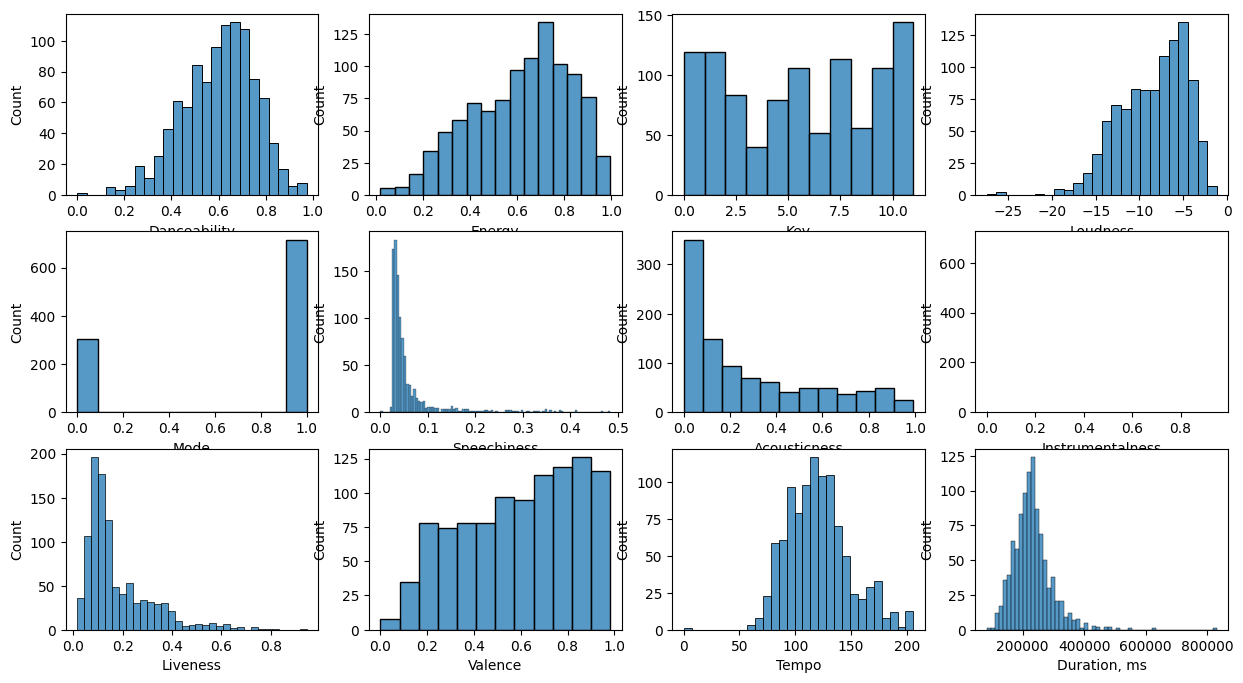

In [ ]:
# @title
# distributions of characteristics;
# danceability, energy, key, loudness,
# mode, speechiness, acousticness, insturmentalness,
# liveness, valence, tempo, duration

fig, axes = plt.subplots(3, 4, figsize = (15, 8))

sns.histplot(data = spotify, x = 'danceability', ax = axes[0, 0])
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Count')

sns.histplot(data = spotify, x = 'energy', ax = axes[0, 1])
axes[0, 1].set_xlabel('Energy')
axes[0, 1].set_ylabel('Count')

sns.histplot(data = spotify, x = 'key', ax = axes[0, 2])
axes[0, 2].set_xlabel('Key')
axes[0, 2].set_ylabel('Count')

sns.histplot(data = spotify, x = 'loudness', ax = axes[0, 3])
axes[0, 3].set_xlabel('Loudness')
axes[0, 3].set_ylabel('Count')

sns.histplot(data = spotify, x = 'mode', ax = axes[1, 0])
axes[1, 0].set_xlabel('Mode')
axes[1, 0].set_ylabel('Count')

sns.histplot(data = spotify, x = 'speechiness', ax = axes[1, 1])
axes[1, 1].set_xlabel('Speechiness')
axes[1, 1].set_ylabel('Count')

sns.histplot(data = spotify, x = 'acousticness', ax = axes[1, 2])
axes[1, 2].set_xlabel('Acousticness')
axes[1, 2].set_ylabel('Count')

sns.histplot(data = spotify, x = 'instrumentalness', ax = axes[1, 3])
axes[1, 3].set_xlabel('Instrumentalness')
axes[1, 3].set_ylabel('Count')

sns.histplot(data = spotify, x = 'liveness', ax = axes[2, 0])
axes[2, 0].set_xlabel('Liveness')
axes[2, 0].set_ylabel('Count')

sns.histplot(data = spotify, x = 'valence', ax = axes[2, 1])
axes[2, 1].set_xlabel('Valence')
axes[2, 1].set_ylabel('Count')

sns.histplot(data = spotify, x = 'tempo', ax = axes[2, 2])
axes[2, 2].set_xlabel('Tempo')
axes[2, 2].set_ylabel('Count')

sns.histplot(data = spotify, x = 'duration_ms', ax = axes[2, 3])
axes[2, 3].set_xlabel('Duration, ms')
axes[2, 3].set_ylabel('Count')

The distributions of some common characteristics of 'liked' tracks, or popular tracks (top 100) can be found in these intitial visualizations. Tracks in major keys are generally preferred to tracks in a minor key; danceability tends to concentrate between 0.5 and 0.8, similar to energy; lower overall acousticness tends to place tracks more often than not in the top 100; as well as low speechiness and lower liveness. In addition, as valence (overall mood) is perceived as more positive, it is also more likely to be placed on the top 100.

Text(0, 0.5, 'Count')

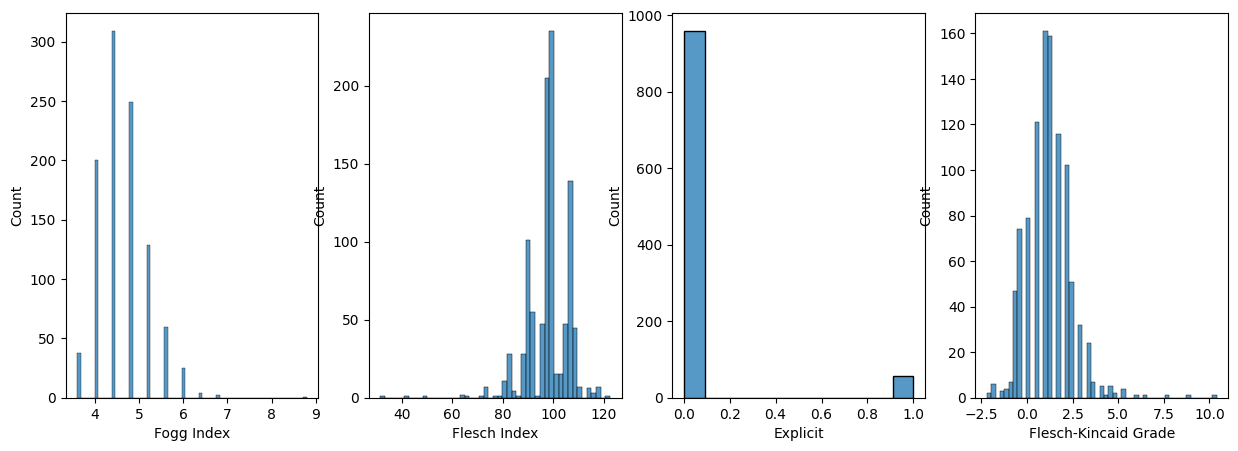

In [ ]:
# @title
# lyric features
# fog, flesch, explicit, fk grade

fig, axes = plt.subplots(1, 4, figsize = (15, 5))

sns.histplot(data = spotify, x = 'fog_index', ax = axes[0])
axes[0].set_xlabel('Fogg Index')
axes[0].set_ylabel('Count')

sns.histplot(data = spotify, x = 'flesch_index', ax = axes[1])
axes[1].set_xlabel('Flesch Index')
axes[1].set_ylabel('Count')

sns.histplot(data = spotify, x = 'explicit', ax = axes[2])
axes[2].set_xlabel('Explicit')
axes[2].set_ylabel('Count')

sns.histplot(data = spotify, x = 'f_k_grade', ax = axes[3])
axes[3].set_xlabel('Flesch-Kincaid Grade')
axes[3].set_ylabel('Count')


Here we can see that lower Fogg Indexed and Flesch-Kincaid graded tracks (less complicated in lyric syntax and vocabulary) tend to be more popular; the Flesch Index holds as well that higher values (easier to read; values in the 100s correlate with 5th grade reading levels) are more well-received in terms of popularity.

In [ ]:
# @title
# most to least occuring words in genre tags
spotify['genre_tags'].value_counts()

,count
genre_tags,
pop,162
rock,120
"pop, rock",96
"electronic/dance, pop",57
country,55
...,...
"jazz, hip-hop/rnb, soul",1
"country, folk, hip-hop/rnb, rock",1
"alternative/indie, folk, pop, rock",1


In [ ]:
# @title
# which genres are most popular? split tags up

all_genres = []
for track_genres in spotify['genre_tags']:
    for genre in track_genres:
        genres = [genre.strip() for genre in track_genres.split(',')]
        all_genres.extend(genres)

from collections import Counter
genre_counts = Counter(all_genres)

genre_counts

Counter({'country': 2238,
         'jazz': 1246,
         'pop': 9775,
         'rock': 5164,
         'swing': 178,
         'blues': 882,
         'hip-hop/rnb': 5118,
         'soul': 2751,
         'folk': 1239,
         'classical/soundtrack': 244,
         'reggae': 967,
         'electronic/dance': 5547,
         'disco': 1257,
         'alternative/indie': 845,
         'religious': 504})

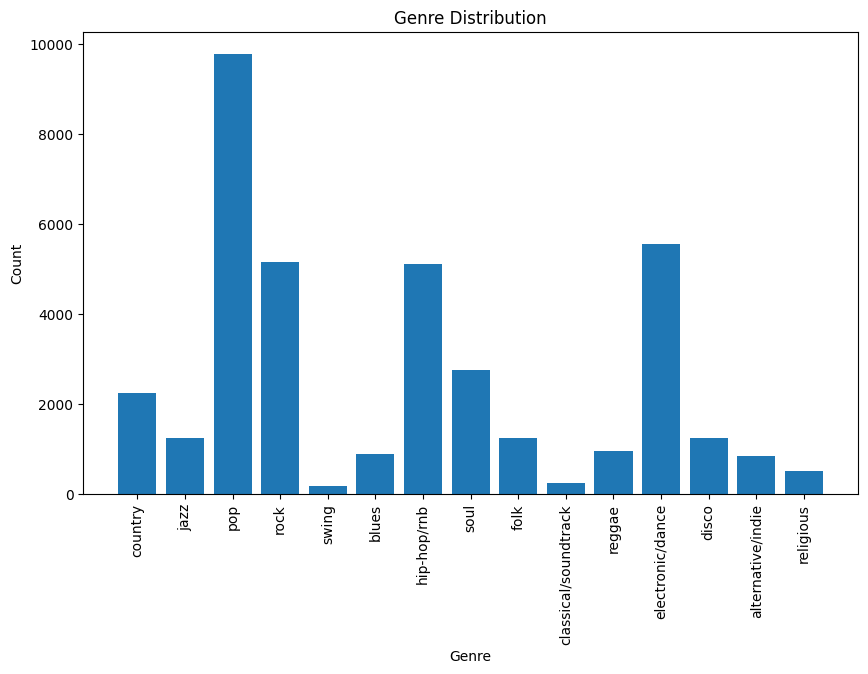

In [ ]:
# @title
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

Here we see a raw count of genre tags amongst top 100 tracks; pop takes a large lead here, although modern interpretations of pop differ from what 'pop' was in the 1950s and 60s. 'Pop' music also simply refers to 'popular music,' which is redundant in the sense that we are already pulling tracks from the top 100 most popular tracks by year. Rock, hip-hop/R&B, and electronic dance follow suit in placing well in terms of popularity.

#### Visualizations over Time

Because of the nature of my goal (predicting trends in upcoming years), first we visualize historic trends/data by way of averages over the years. The first chart displays features of popular tracks averaged by year, and tracks the patterns from 1951 to 2015.

In [ ]:
# @title
yearlyspotify = spotify.groupby('year')

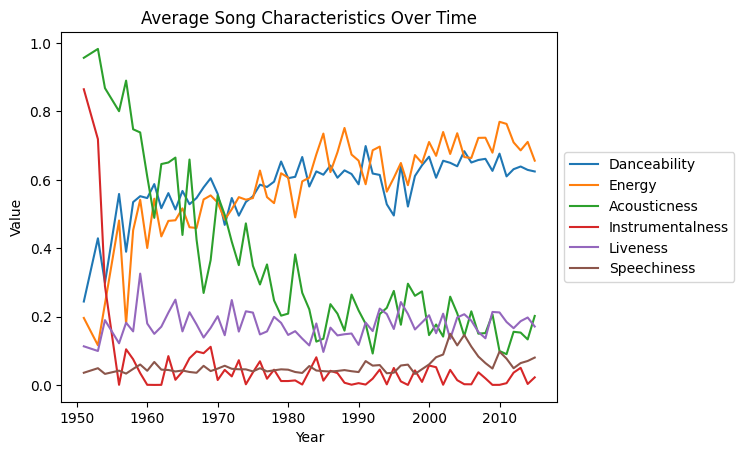

In [ ]:
# @title
yearlyspotify['danceability'].mean().plot()
yearlyspotify['energy'].mean().plot()
yearlyspotify['acousticness'].mean().plot()
yearlyspotify['instrumentalness'].mean().plot()
yearlyspotify['liveness'].mean().plot()
yearlyspotify['speechiness'].mean().plot()

plt.legend(['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness'],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Song Characteristics Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

These traits appear, at first look, to roughly correlate with one another. There is a downward trend of acousticness from the 50's; an initial drop for instrumentalness which tempers itself into relatively stable fluctuations onwards from the 60s; upwards trends for energy and danceability; and relatively stable fluctuations in liveness. However, the spikes in popularity of different features appear to take place at similar points in time some– but not all– of the time.

Text(0.5, 1.0, 'Avg. Tempo of Popular Tracks')

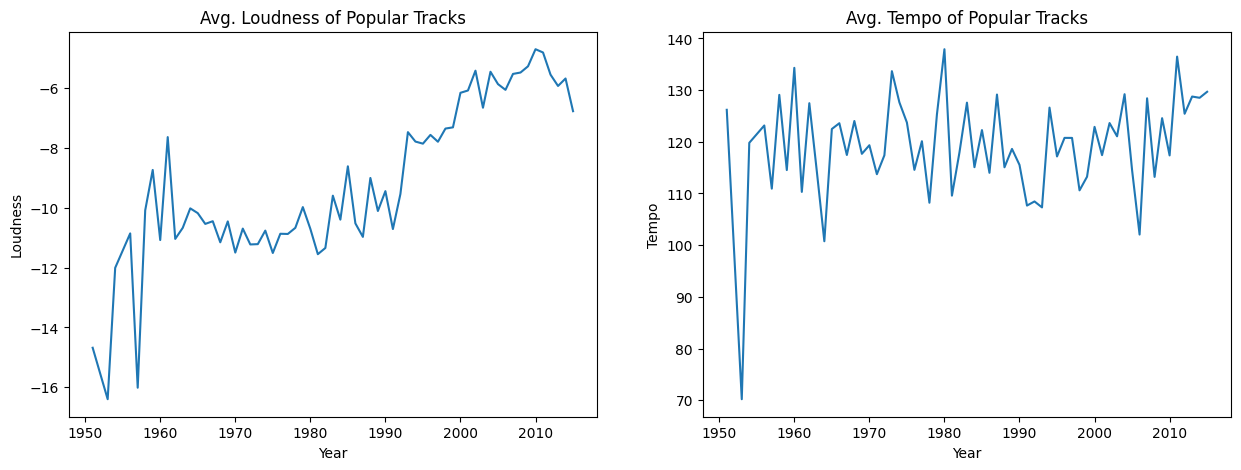

In [ ]:
# @title
# loudness, tempo
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

yearlyspotify['loudness'].mean().plot(ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Loudness')
axes[0].set_title('Avg. Loudness of Popular Tracks')

yearlyspotify['tempo'].mean().plot(ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Tempo')
axes[1].set_title('Avg. Tempo of Popular Tracks')

Loudness here demonstrates an upward trend (here I wonder if it is due to advances in the music production technology that music is just generally able to be louder); and tempo largely fluctuates with some degree of potential seasonality, but appearing to be mostly random.

In [ ]:
# @title
# 'standardize' track key feature to plot onto valence, mode features over time
spotify['standardkey'] = spotify['key']/10

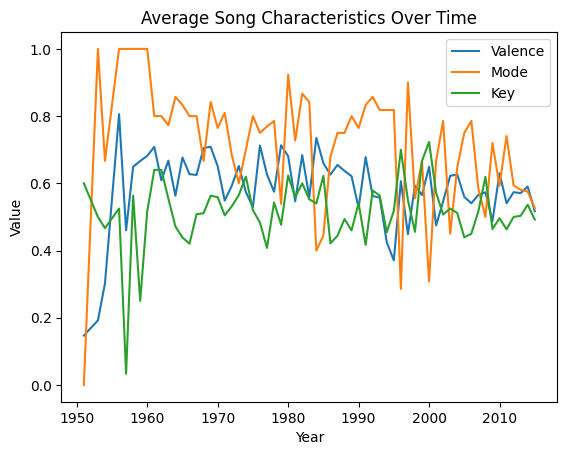

In [ ]:
# @title
yearlyspotify['valence'].mean().plot()
yearlyspotify['mode'].mean().plot()
yearlyspotify['standardkey'].mean().plot()

plt.legend(['Valence', 'Mode', 'Key'])
plt.title('Average Song Characteristics Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

The 'sounds' of popular tracks appear to move in time with one another; valence (positive/negative attributed 'mood' of tracks) and mode (major vs. minor).

Text(0.5, 1.0, 'Avg. Presence of Explicit Content in Popular Tracks')

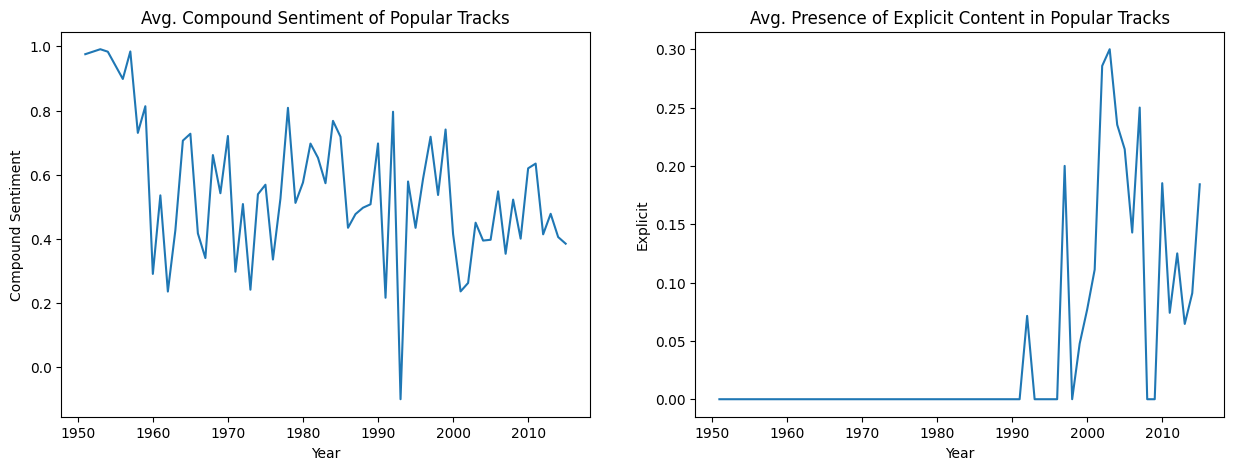

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

yearlyspotify['compound_sentiment'].mean().plot(ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Compound Sentiment')
axes[0].set_title('Avg. Compound Sentiment of Popular Tracks')

yearlyspotify['explicit'].mean().plot(ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Explicit')
axes[1].set_title('Avg. Presence of Explicit Content in Popular Tracks')

From this we see that explicit content has experienced an increased, although fluctuating, presence in popular tracks. This can likely be attributed to shifting social/cultural tones, and the rise of popularity of rap/hip-hop/the overall liberation of self-expression in music. Compound sentiment fluctuates as well year to year, with a noticeable dip in the early 90's (I assume from the emo/grunge era of popular culture).

Text(0.5, 1.0, 'Avg. Flesch-Kincaid Grade of Popular Tracks')

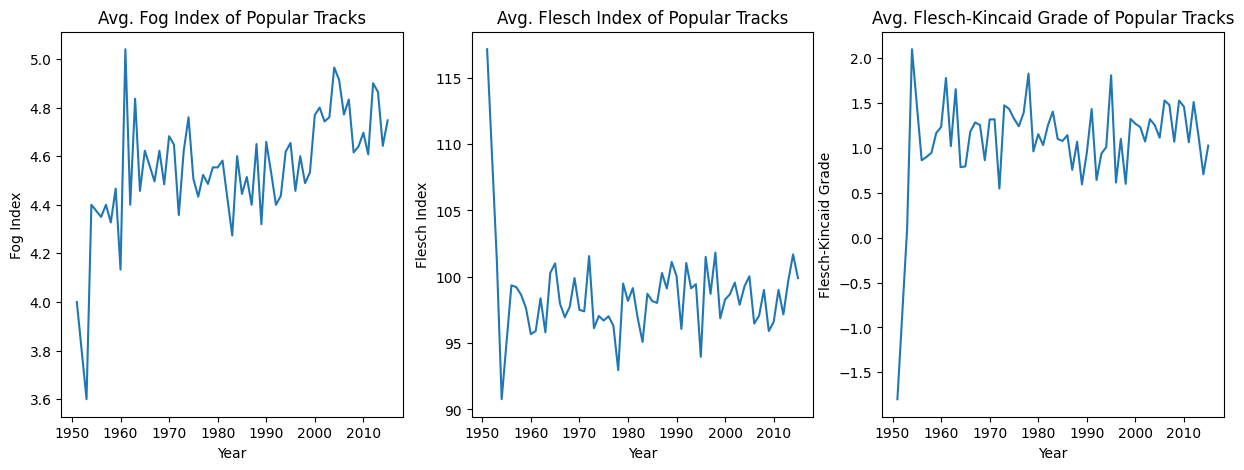

In [ ]:
# @title
fig, axes = plt.subplots(1, 3, figsize = (15,5))

yearlyspotify['fog_index'].mean().plot(ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Fog Index')
axes[0].set_title('Avg. Fog Index of Popular Tracks')

yearlyspotify['flesch_index'].mean().plot(ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Flesch Index')
axes[1].set_title('Avg. Flesch Index of Popular Tracks')

yearlyspotify['f_k_grade'].mean().plot(ax=axes[2])
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Flesch-Kincaid Grade')
axes[2].set_title('Avg. Flesch-Kincaid Grade of Popular Tracks')

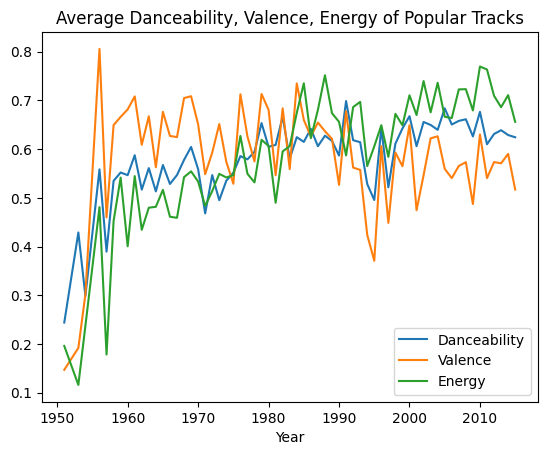

In [ ]:
# @title
yearlyspotify['danceability'].mean().plot()
yearlyspotify['valence'].mean().plot()
yearlyspotify['energy'].mean().plot()

plt.xlabel('Year')
plt.title('Average Danceability, Valence, Energy of Popular Tracks')
plt.legend(['Danceability', 'Valence', 'Energy'])
plt.show()

At first look, with the hopes of finding seasonality and trends, we see that danceability is the most vague/subjective unit of measurement. Assuming this measure encompasses multiple characteristics, I will verify this notion first, and moving forward base forecasting models off of the 'danceability' feature. This could be a potential flaw in the overall analysis of predictability of trending features in popular tracks, but I will cross that bridge when I get there.

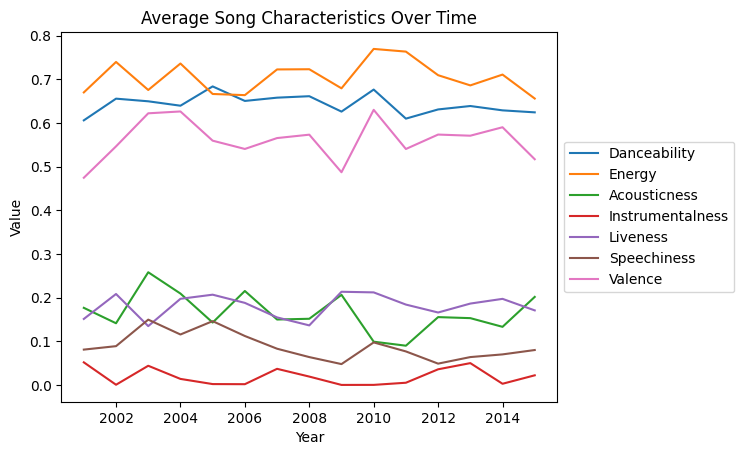

In [ ]:
# @title
# zoom in on post 2000
post2000 = spotify[spotify['year'] > 2000].groupby('year')

post2000['danceability'].mean().plot()
post2000['energy'].mean().plot()
post2000['acousticness'].mean().plot()
post2000['instrumentalness'].mean().plot()
post2000['liveness'].mean().plot()
post2000['speechiness'].mean().plot()
post2000['valence'].mean().plot()

plt.legend(['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness', 'Valence'],
           loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Song Characteristics Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

###Defining **Danceability**:

####1. Sound Profiles

**Instrumentalness**: Likelihood that the track is purely instrumental (vs. having vocals).

**Acousticness**: How acoustic (natural) the sound is.

**Speechiness**: The presence of spoken words in the track.

Text(0, 0.5, 'Danceability')

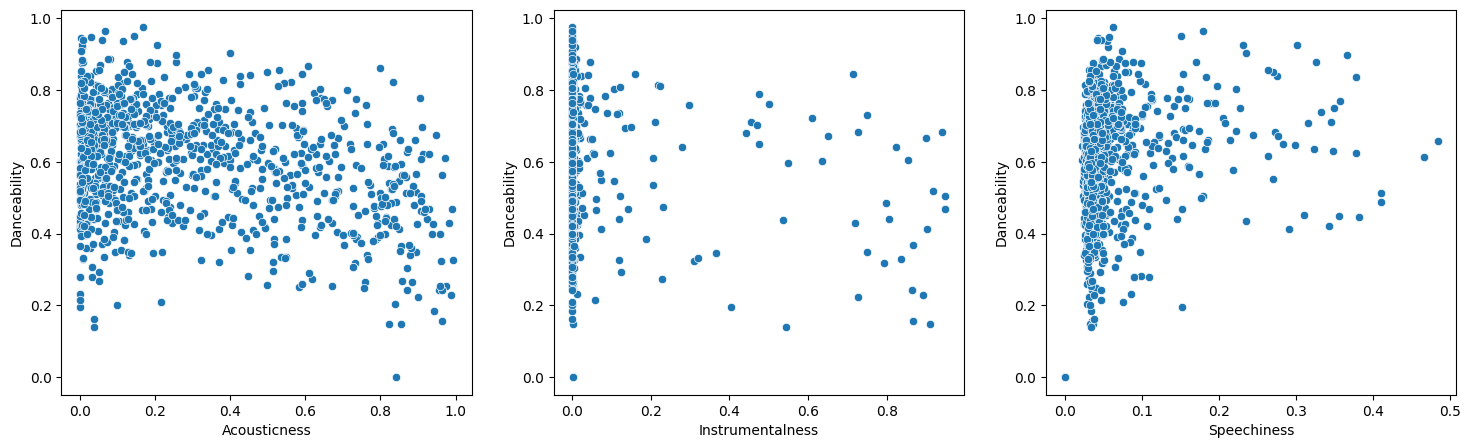

In [ ]:
# @title
# what determines danceability?
# sound profiles; instrumentalness, acousticness, speechiness
fig, ax = plt.subplots(1, 3, figsize = (18, 5))

sns.scatterplot(data = spotify, x = 'acousticness', y = 'danceability', ax = ax[0])
ax[0].set_xlabel('Acousticness')
ax[0].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'instrumentalness', y = 'danceability', ax = ax[1])
ax[1].set_xlabel('Instrumentalness')
ax[1].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'speechiness', y = 'danceability', ax = ax[2])
ax[2].set_xlabel('Speechiness')
ax[2].set_ylabel('Danceability')


In terms of acousticness, high danceability of a song loosely correlates with lower acousticness, though not to a noticeably indicative extent. The same can be said of instrumentalness and speechiness, although it is perhaps more accurate to say that there is no correlation between the latter two and danceability.

#### 2. Rhythm and Temporal Factors

**Liveness**: Indicates the probability that the track was performed live.

**Tempo**: The speed or pace of the music (beats per minute).

**Duration**: The length of the track (in milliseconds).

**Loudness**: The overall volume or sound intensity.

**Time Signature**: The rhythmic pattern of the music (e.g., 3/4, 4/4).

Text(0, 0.5, 'Danceability')

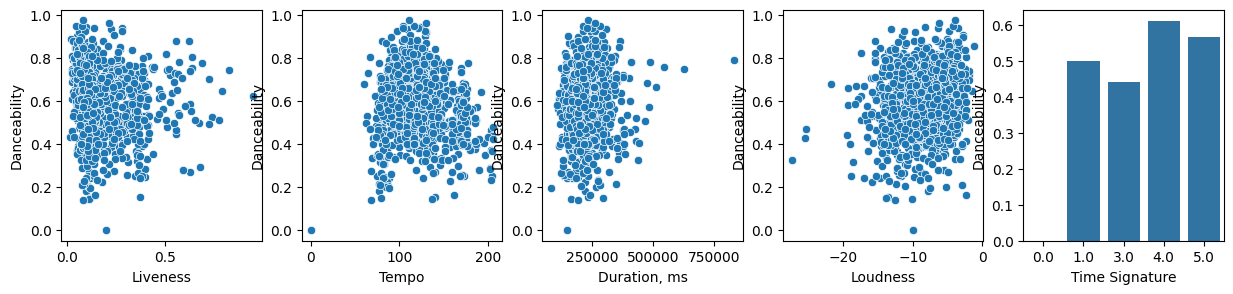

In [ ]:
# @title
fig, ax = plt.subplots(1, 5, figsize = (15, 3))

sns.scatterplot(data = spotify, x = 'liveness', y = 'danceability', ax = ax[0])
ax[0].set_xlabel('Liveness')
ax[0].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'tempo', y = 'danceability', ax = ax[1])
ax[1].set_xlabel('Tempo')
ax[1].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'duration_ms', y = 'danceability', ax = ax[2])
ax[2].set_xlabel('Duration, ms')
ax[2].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'loudness', y = 'danceability', ax = ax[3])
ax[3].set_xlabel('Loudness')
ax[3].set_ylabel('Danceability')

sns.barplot(data = spotify, x = 'time_signature', y = 'danceability', ax = ax[4], errorbar = None)
ax[4].set_xlabel('Time Signature')
ax[4].set_ylabel('Danceability')

Liveness did not seem to correlate highly with danceability, and nor did tempo, duration, loudness, and time signatures.

####3. Harmonic and Melodic

**Energy**: A measure of intensity and activity.

**Valence**: The emotional positivity or negativity of the track (higher, happy/cheerful; lower, sad/somber)

**Mode**: Whether the song is in a major 1 (happy/bright) or minor 0 (sad/dark) key.

**Key**: From C to B, including sharps/flats, 12 key scale

Text(0, 0.5, 'Danceability')

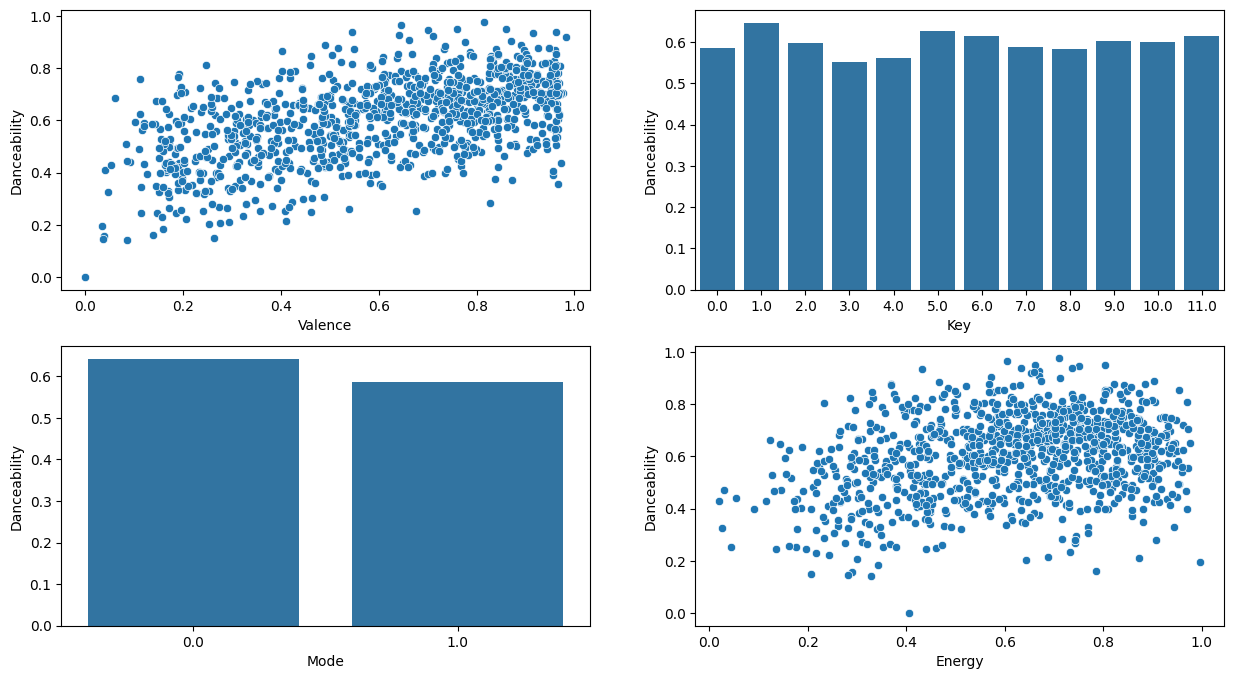

In [ ]:
# @title
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

sns.scatterplot(data = spotify, x = 'valence', y = 'danceability', ax = axes[0, 0])
axes[0, 0].set_xlabel('Valence')
axes[0, 0].set_ylabel('Danceability')

sns.barplot(data = spotify, x = 'key', y = 'danceability', ax = axes[0, 1], errorbar=None)
axes[0, 1].set_xlabel('Key')
axes[0, 1].set_ylabel('Danceability')

sns.barplot(data = spotify, x = 'mode', y = 'danceability', ax = axes[1, 0], errorbar = None)
axes[1, 0].set_xlabel('Mode')
axes[1, 0].set_ylabel('Danceability')

sns.scatterplot(data = spotify, x = 'energy', y = 'danceability', ax = axes[1, 1])
axes[1, 1].set_xlabel('Energy')
axes[1, 1].set_ylabel('Danceability')

Key, and mode don't seem to beindicative of danceability; however, energy and valence have stronger correlations with higher danceability. From these visualizations we see that the subjective 'danceability' draws more noticeably from factors of energy and valence; the more positive a track comes across, the more danceable it is. The same can be said of energy (which is a combination of perceived loudness, tempo, rhythmic stability, and general intensity, per Spotify's API documentation).

## Modeling & Interpretations

To predict characteristics of upcoming top 100 tracks, I plan to use different regression models and analyze which perform best in predicting recurring nature of trends (in this case, we have zeroed in on 'danceability' as being the predictive variable).

#### Baseline Model

I aim to utilize forecasting models in measuring potential seasonalities of track features; for this, an effective baseline model would be a naive forecast. As for the other models, I must first test if danceability has any seasonality, trends, or stationarity. To do this I utilized an autocorrelation plot to attempt to identify if the feature holds any seasonality.

In [ ]:
# @title
# convert yearlyspotify groupby object into a series with a proper time index
danceability_series = yearlyspotify['danceability'].mean().reset_index()
danceability_series = danceability_series.set_index('year')
danceability_series.index = pd.to_datetime(danceability_series.index, format='%Y').to_period('Y')

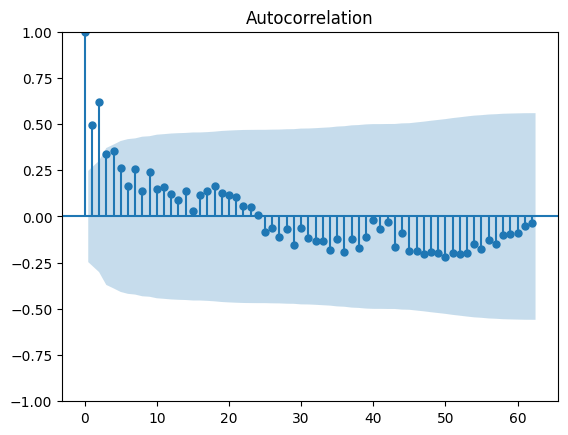

In [ ]:
# @title
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot the ACF
plot_acf(danceability_series, lags=62)  # Check up to 50
plt.show()

From the autocorrelation plot I concluded that there was no seasonality in the 'danceability' characteristic. From previous graphics demonstrating fluctuations over time on an averaged scale, we also did not witness any strong trends. Therefore, although I will use predictive models (Holt Winters) that require some degree of seasonality, I preface this usage with the disclaimer that I do not expect it to be wholly accurate in its predictive ability. The use of ARIMA modelling will perhaps yield stronger results, but that cannot be promised.

In [ ]:
# @title
flesch_index_series = yearlyspotify['flesch_index'].mean().reset_index()
flesch_index_series = flesch_index_series.set_index('year')
flesch_index_series.index = pd.to_datetime(flesch_index_series.index, format='%Y').to_period('Y')

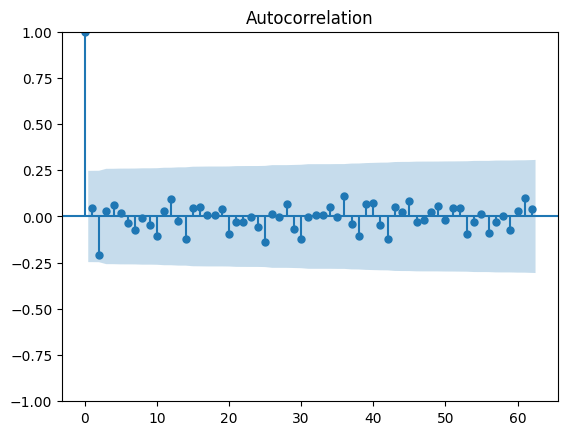

In [ ]:
# @title
plot_acf(flesch_index_series, lags=62)
plt.show()

In [ ]:
# @title
comp_sent_series = yearlyspotify['compound_sentiment'].mean().reset_index()
comp_sent_series = comp_sent_series.set_index('year')
comp_sent_series.index = pd.to_datetime(comp_sent_series.index, format='%Y').to_period('Y')

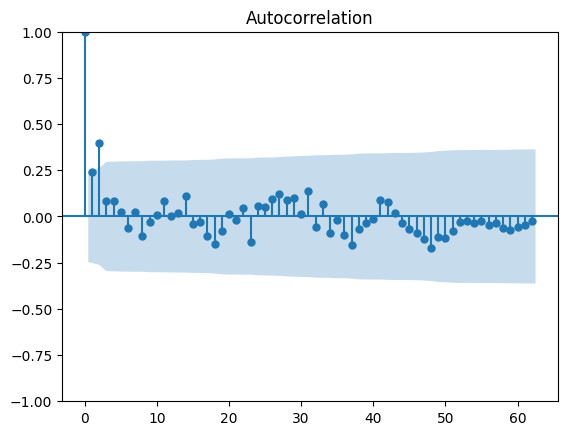

In [ ]:
# @title
plot_acf(comp_sent_series, lags=62)
plt.show()

To be sure, I also tested the autocorrelative nature of the Flesch Index and compound sentiment averages. This ruled out the seasonality of lyrical components influencing popularity of tracks. I will continue with the 'danceability' feature, despite the lack of seasonality.

In [ ]:
# @title
# !pip install sktime

In [ ]:
# @title
from sktime.forecasting.naive import NaiveForecaster
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
# @title
# temporal_train_test_split
X_train, X_test = temporal_train_test_split(danceability_series)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


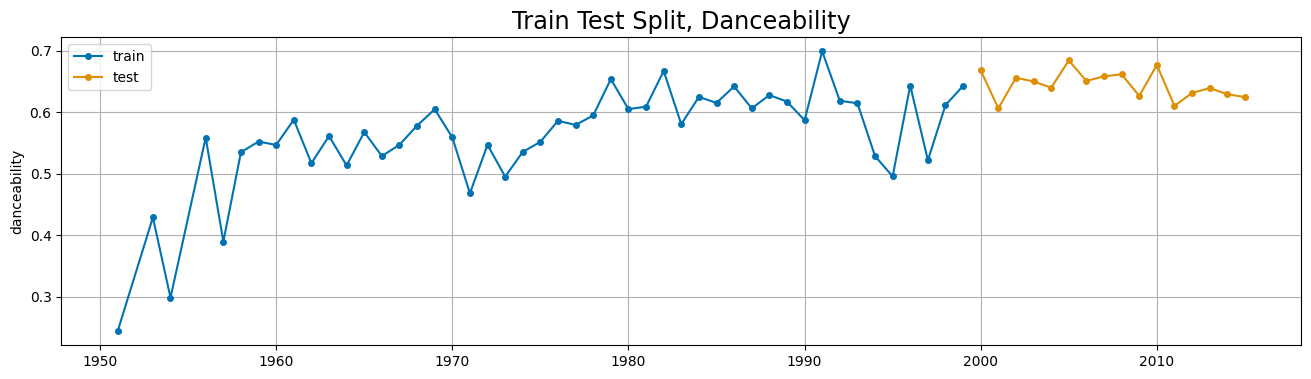

In [ ]:
# @title
plot_series(X_train, X_test, labels = ['train', 'test'], title = 'Train Test Split, Danceability')
plt.grid();

In [ ]:
# @title
# time steps to forecast?
fh = np.arange(len(X_test))

#### Baseline Performance

In [ ]:
# @title
baseline = NaiveForecaster(strategy = 'last')
# fit model
baseline.fit(X_train)
# predict for horizon
baseline_pred = baseline.predict(fh)

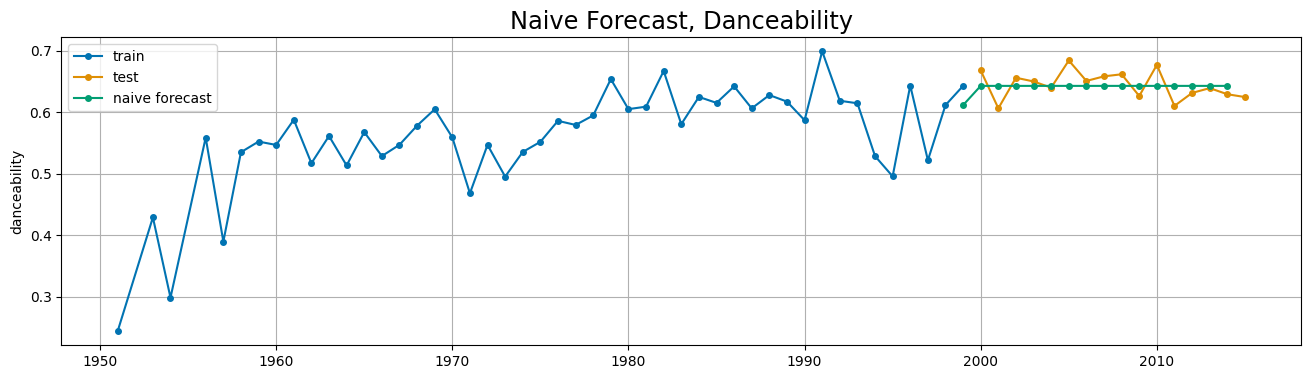

In [ ]:
# @title
plot_series(X_train, X_test, baseline_pred, labels = ['train', 'test', 'naive forecast'], title = 'Naive Forecast, Danceability')
plt.grid();

In [ ]:
# @title
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [ ]:
# @title
mape = MeanAbsolutePercentageError()

In [ ]:
# @title
print(f'Naive MAPE value: {mape(X_test, baseline_pred)}')

Naive MAPE value: 0.031839013159768434


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


The mean absolute percentage error for the Naive Forecaster model yielded a value of 0.0318

#### Weighted Moving Average Model

In [ ]:
# @title
exp = ExponentialSmoothing()

In [ ]:
# @title
exp.fit(X_train)

ExponentialSmoothing()

In [ ]:
# @title
exp_preds = exp.predict(fh)

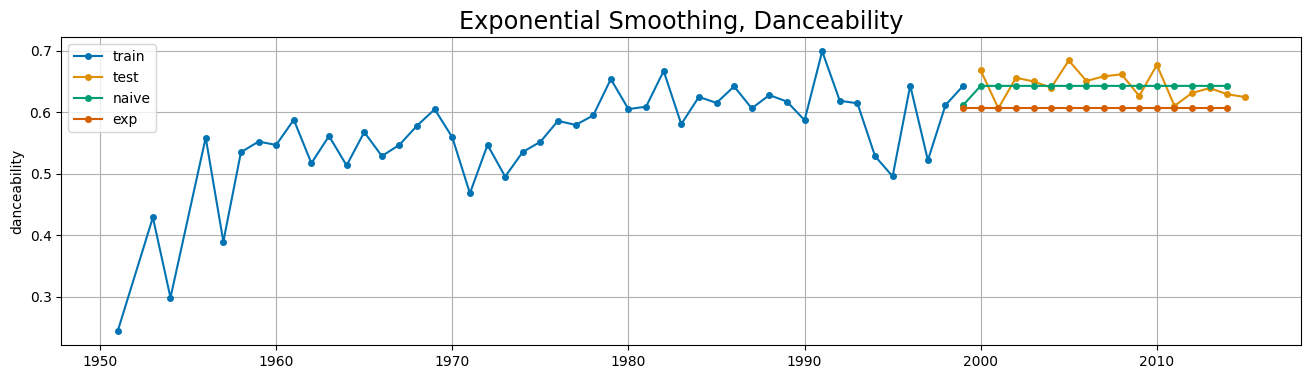

In [ ]:
# @title
# plot
plot_series(X_train, X_test, baseline_pred, exp_preds, labels = ['train', 'test', 'naive', 'exp'], title = 'Exponential Smoothing, Danceability')
plt.grid();

In [ ]:
# @title
print(f'Exponential Smoothing MAPE value: {mape(X_test, exp_preds)}')

Exponential Smoothing MAPE value: 0.05716978660091045


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


The Exponential Smoothing model yielded a mean absolute percentage error value of 0.0571; this is higher than the naive forecast.

#### Holt Winters Model, Additive and Multiplicative

In [ ]:
# @title
holt_add = ExponentialSmoothing(trend = 'additive', seasonal = 'additive', sp = 15)
holt_mult = ExponentialSmoothing(trend = 'multiplicative', seasonal = 'multiplicative', sp = 15)

In [ ]:
# @title
holt_add.fit(X_train)
holt_mult.fit(X_train)

ExponentialSmoothing(seasonal='multiplicative', sp=15, trend='multiplicative')

In [ ]:
# @title
holt_add_pred = holt_add.predict(fh)
holt_mult_pred = holt_mult.predict(fh)

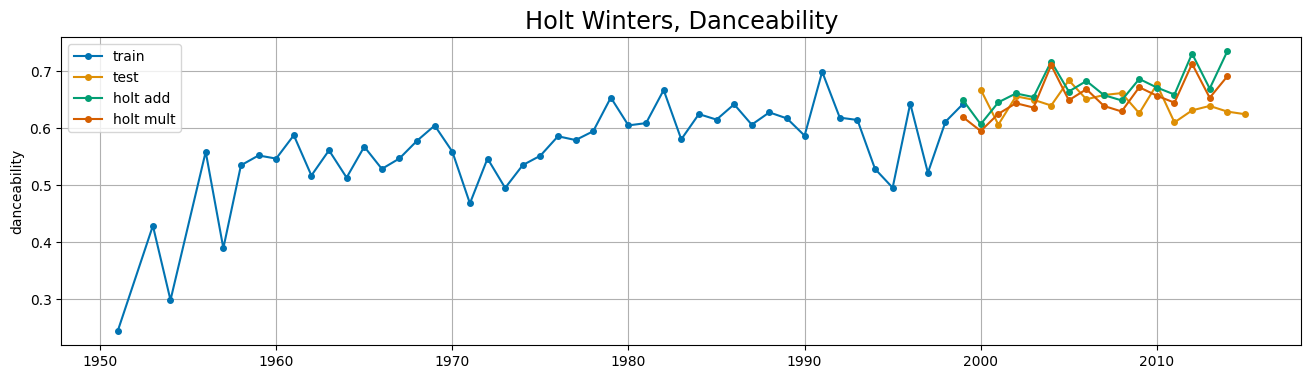

In [ ]:
# @title
plot_series(X_train, X_test, holt_add_pred, holt_mult_pred, labels = ['train', 'test', 'holt add', 'holt mult'], title = 'Holt Winters, Danceability')
plt.grid();

In [ ]:
# @title
print(f'Holt(Additive) Winters MAPE: {mape(X_test, holt_add_pred)}')
print(f'Holt (Multiplicative) Winters MAPE: {mape(X_test, holt_mult_pred)}')

Holt(Additive) Winters MAPE: 0.048500861250261595
Holt (Multiplicative) Winters MAPE: 0.03840280014315638


/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


The Holt Winters models were a bit more promising than the weighted average, but still did not perform better than the baseline; this is likely due to the lack of seasonality in the data.

Additive model MAPE yielded a value of 0.0485

Multiplicative model MAPE yielded a value of 0.0384 (second best model to the baseline)

#### AutoARIMA Model

In [ ]:
# @title
!pip install pmdarima
import pmdarima as pm

In [ ]:
# @title
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.arima import ARIMA

In [ ]:
# @title
auto_arima = AutoARIMA(sp = 15)

In [ ]:
# @title
auto_arima.fit(X_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sari

AutoARIMA(sp=15)

In [ ]:
# @title
auto_pred = auto_arima.predict(fh)

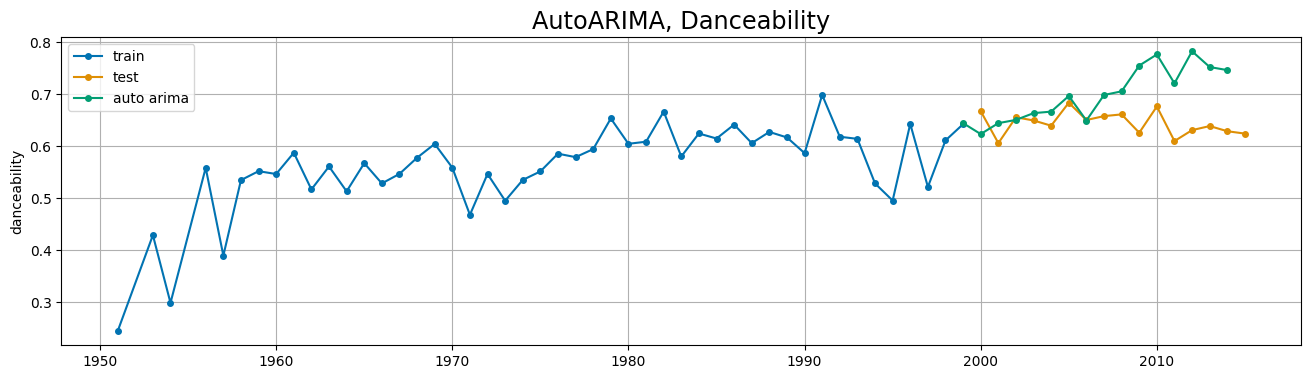

In [ ]:
# @title
plot_series(X_train, X_test, auto_pred, labels = ['train', 'test', 'auto arima'], title = 'AutoARIMA, Danceability')
plt.grid();

In [ ]:
# @title
mape(X_test, auto_pred)

/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


0.09765302669181458

#### ARIMA Model

In [ ]:
# @title
arima = ARIMA(order = (3, 1, 2))

In [ ]:
# @title
arima.fit(X_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(3, 1, 2))

In [ ]:
# @title
arima_pred = arima.predict(fh)

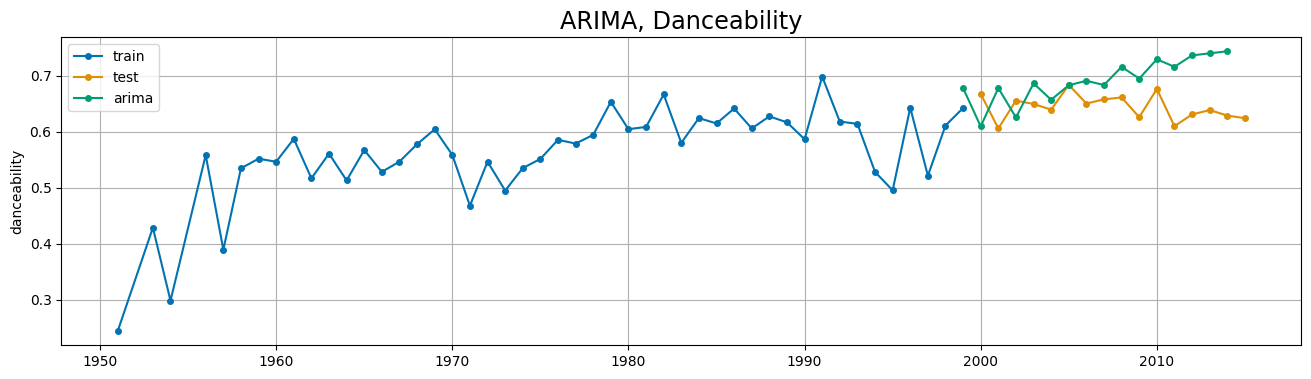

In [ ]:
# @title
plot_series(X_train, X_test, arima_pred, labels = ['train', 'test', 'arima'], title = 'ARIMA, Danceability')
plt.grid();

In [ ]:
# @title
mape(X_test, arima_pred)

/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:645: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


0.0851143349351528

Surprisingly, both the ARIMA and AutoARIMA models yielded mean absolute percentage error values (0.085, 0.097) higher than the Holt Winters model. To this I am prompted to wonder if there is a degree of seasonality I overlooked in my initial visualizations, despite the seemingly random fluctuations in danceability for top 100 tracks.

## Next Steps & Discussion

#### Summary of Findings

In my analysis of the annual top 100 tracks on Spotify, the models I constructed demonstrated decreased performance over the baseline predictor, signalling the ineffectiveness of my efforts to predict seasonal fluctuations in tastes and preferences of sound characteristics in popular music. My models ranked in terms of worst to best performance (based on MAPE values) as follows: AutoARIMA, ARIMA, Weighted Moving Average Model, Additive Holt Winters, Multiplicative Holt Winters, and the Naive Forecast.

Key Findings:

1) Success of the Naive Forecast:

The baseline model being more adequate than the others indicates that the data may be simple to the extent that a naive forecast (that the next period is likely the last observed value) captures the pattern more than a more complex model might.

2) Failure of Forecasting Models:

It could also be conferred that my other models have overfitted the training data and failed to generaize the test set: this could have been due to faulty parameters, or inaccurate model selection for the type of forecasting this dataset required.

Another issue that could have taken place is that the underlying patterns in the data were not aligned to the types of models being used: the data may have had trends or seasonal components I failed to take into account when building my models.


4) Data Misalignment

Outliers in subjective units of measure (such as danceability or other characteristic preferences in top 100 tracks) may have skewed the performance of the more advanced models; or perhaps the short-term nature of year-by-year averages presented too many 'unpredictable' fluctuations, and a bigger picture view (by decade, perhaps) would have produced more accurate predictive models.

In conclusion, the success of the Naive Forecast model indicated to me that based on a year-by-year analysis, changing tastes in preferences of song characteristics were not accurately modeled using the methods enlisted in this assignment. My findings encourage further research and modelling work on understanding fluctuating tastes of popular culture and music: whether that is shifting forecasting sights onto a larger, long-term scale, or taking on alternative forecasting methods that would better suit the nature of this model's goals.

#### Next Steps/Improvements

In this analysis, I have come to realize that cyclical tastes are much more influenced by economic, social, and otherwise cultural forces– my assumption today was that these tastes are 'seasonal' over stretches of decades on a year-by-year basis, which may have hindered the accuracy of my predictive models.

To narrow it down, a better selection of data to base these predictive models off of may be monthly top 100 tracks within a shorter time span of, say, 2000-2020; however, my initial aversion to this option was based on wanting to examine broader trending characteristics of popular music, as opposed to seasonal trends (where winter/summer periods may play a role in influencing tastes, as opposed to more noticeable shifts in public preference).

Alternatively, to broaden the scope of this analysis instead, I believe that in the future using more complex econometric analysis models to factor in wide-spanning periods of shifting tastes would yield more accurate predictive models. Further, measuring different characteristics besides simply 'danceability' (which I chose in this modelling excercise simply because of the broad range of other popular characteristics it encompassed) would also likely yield more or less accurate results.

By taking into consideration these alternative methods and perspectives, I would be able to refine and generate either more accurate forecasting models or come to more nuanced understandings of tastes and preferences when it comes to popular music. These approaches, if utilized effectively and successfully, could lead to accurate predictions and actionable insights for the music production industry and its stakeholders.
